<a href="https://colab.research.google.com/github/SameenRafi/Traffic-Sign-Classification-Using-Deep-Learning-in-Python-Keras/blob/main/My_modelfortheproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [ ]:
with open("/content/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
X_train,y_train = train['features'],train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [ ]:
X_test.shape

(12630, 32, 32, 3)

In [ ]:
y_test.shape

(12630,)

3

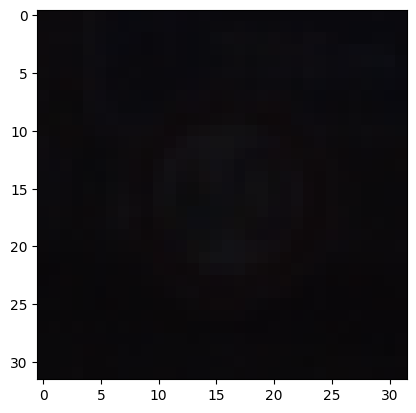

In [ ]:
i = random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]


In [ ]:
!pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 92.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn


In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)

In [ ]:
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

<Figure size 640x480 with 0 Axes>

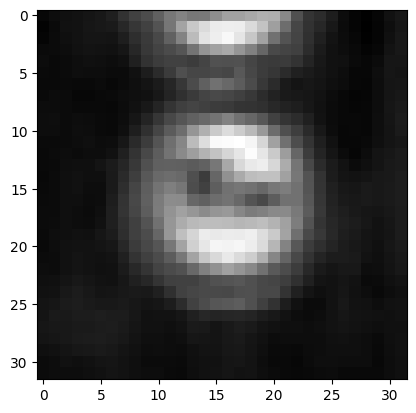

<Figure size 640x480 with 0 Axes>

In [ ]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()

In [ ]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [ ]:
X_train_gray_norm

array([[[[ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [-0.48958333],
         [-0.50520833],
         [-0.5       ]],

        [[ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [-0.5546875 ],
         [-0.5703125 ],
         [-0.55729167]],

        [[ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [-0.5703125 ],
         [-0.625     ],
         [-0.61458333]],

        ...,

        [[-0.1796875 ],
         [-0.03645833],
         [ 0.03385417],
         ...,
         [-0.58072917],
         [-0.65104167],
         [-0.65364583]],

        [[-0.2578125 ],
         [-0.05989583],
         [-0.00520833],
         ...,
         [-0.56510417],
         [-0.6484375 ],
         [-0.64322917]],

        [[-0.33854167],
         [-0.16927083],
         [-0.09635417],
         ...,
         [-0.58072917],
         [-0.64322917],
         [-0.63541667]]],


       [[[ 0.296875  ],


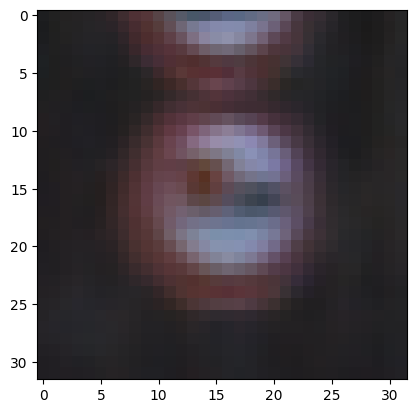

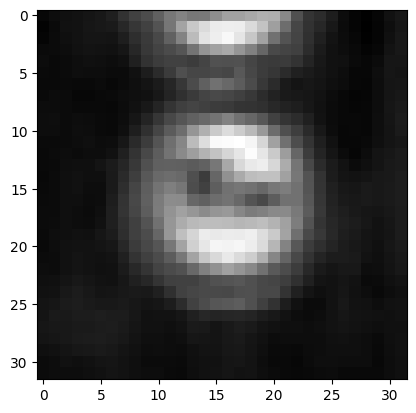

In [ ]:
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(10,kernel_size=(3,3),padding = 'valid',activation = 'relu',input_shape=(32,32,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(20,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(120,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(84,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(43,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 10)        100       
                                                                 
 batch_normalization_3 (Bat  (None, 30, 30, 10)        40        
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 20)        1820      
                                                                 
 batch_normalization_4 (Bat  (None, 13, 13, 20)        80        
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train_gray_norm,y_train,batch_size=500,epochs=15,verbose=1,validation_data=(X_validation_gray_norm,y_validation))

Epoch 1/15
70/70 [==============================] - 14s 21ms/step - loss: 2.5913 - accuracy: 0.3186 - val_loss: 3.5344 - val_accuracy: 0.1016
Epoch 2/15
70/70 [==============================] - 1s 11ms/step - loss: 0.9528 - accuracy: 0.7145 - val_loss: 3.2805 - val_accuracy: 0.1240
Epoch 3/15
70/70 [==============================] - 1s 10ms/step - loss: 0.4555 - accuracy: 0.8607 - val_loss: 2.6260 - val_accuracy: 0.2667
Epoch 4/15
70/70 [==============================] - 1s 9ms/step - loss: 0.2854 - accuracy: 0.9119 - val_loss: 1.6658 - val_accuracy: 0.5086
Epoch 5/15
70/70 [==============================] - 1s 9ms/step - loss: 0.1960 - accuracy: 0.9411 - val_loss: 0.8861 - val_accuracy: 0.7395
Epoch 6/15
70/70 [==============================] - 1s 9ms/step - loss: 0.1488 - accuracy: 0.9544 - val_loss: 0.5358 - val_accuracy: 0.8549
Epoch 7/15
70/70 [==============================] - 1s 9ms/step - loss: 0.1175 - accuracy: 0.9639 - val_loss: 0.3609 - val_accuracy: 0.8889
Epoch 8/15
70/70

In [ ]:
score = model.evaluate(X_test_gray_norm, y_test)
print('test accuracy'.format(score[1]))

395/395 [==============================] - 1s 4ms/step - loss: 0.4019 - accuracy: 0.9102
test accuracy


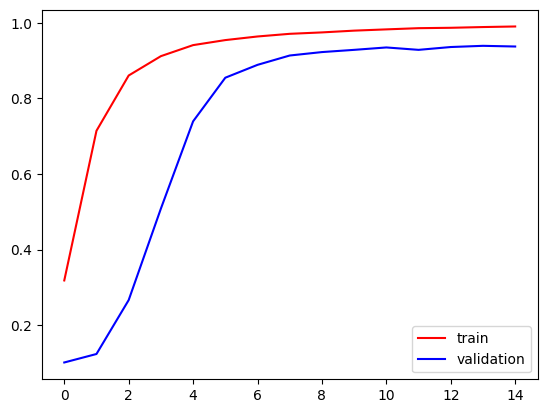

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

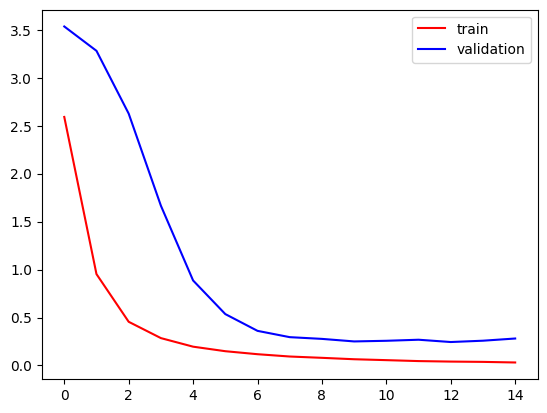

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test_gray_norm)
predicted_classes = np.argmax(predictions, axis=-1)
y_true = y_test

395/395 [==============================] - 1s 2ms/step


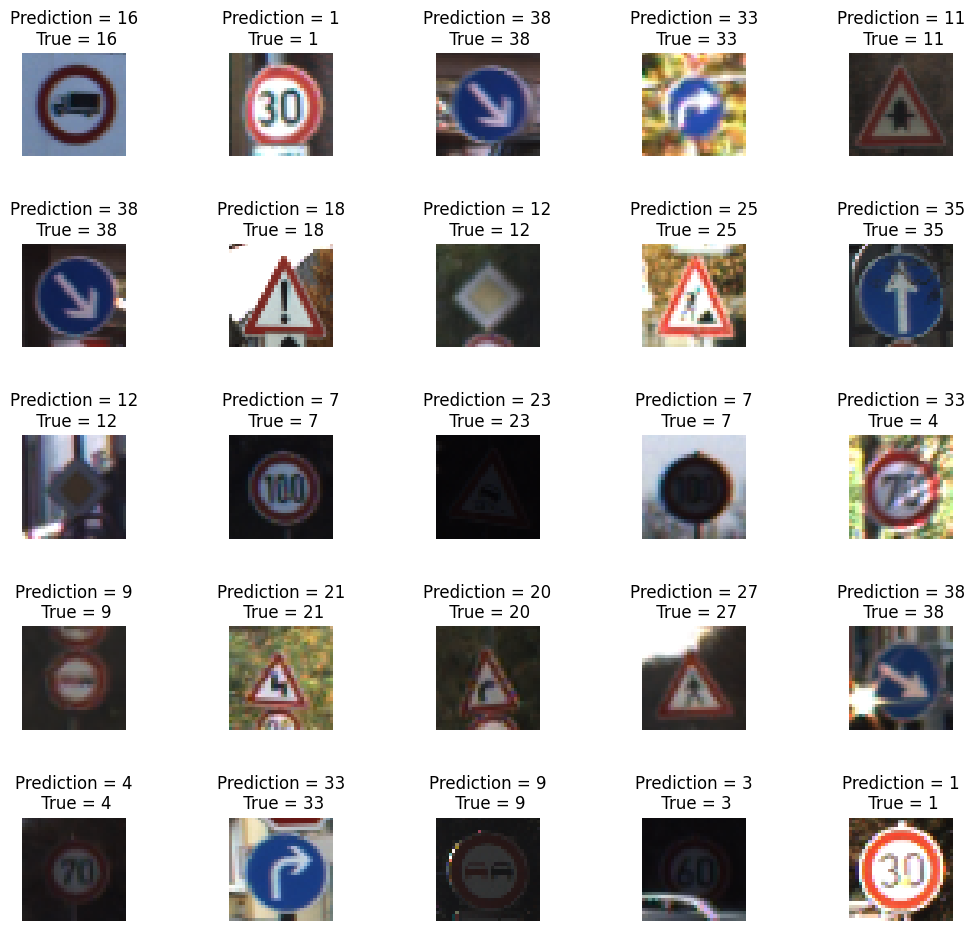

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)